In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/family_financial_and_transactions_data.xlsx')
data

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,2024-10-10,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,2024-10-22,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,2024-10-29,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,2024-10-26,Travel,467.46,44621,44081,4296,2470,2831,4,92


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

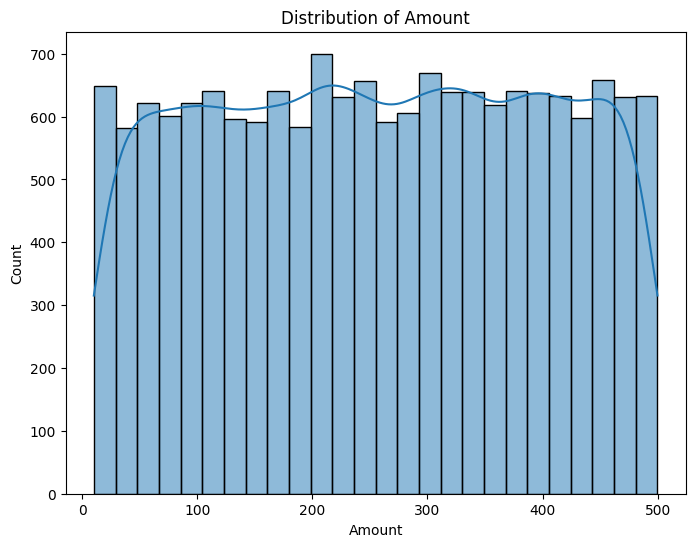

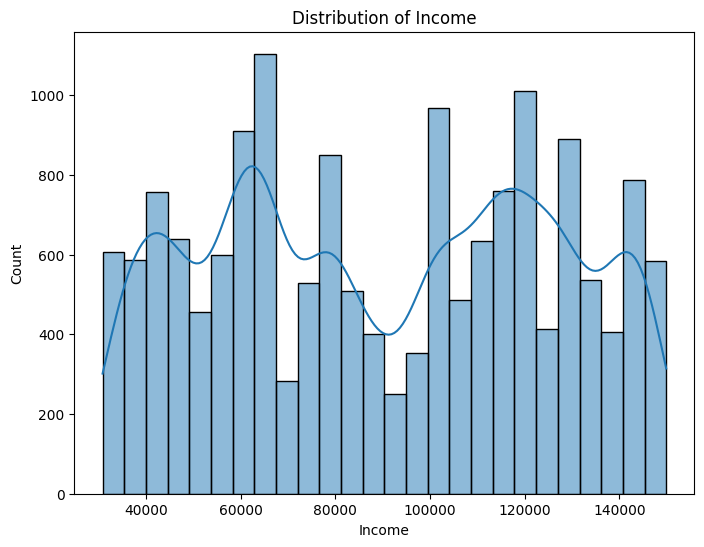

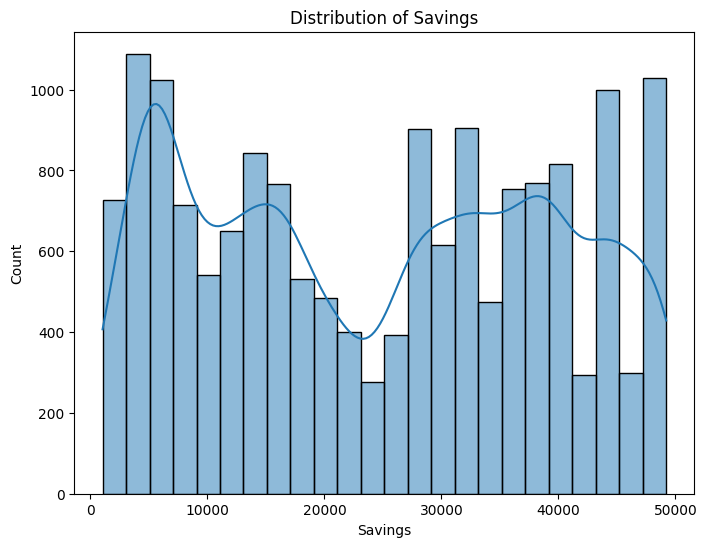

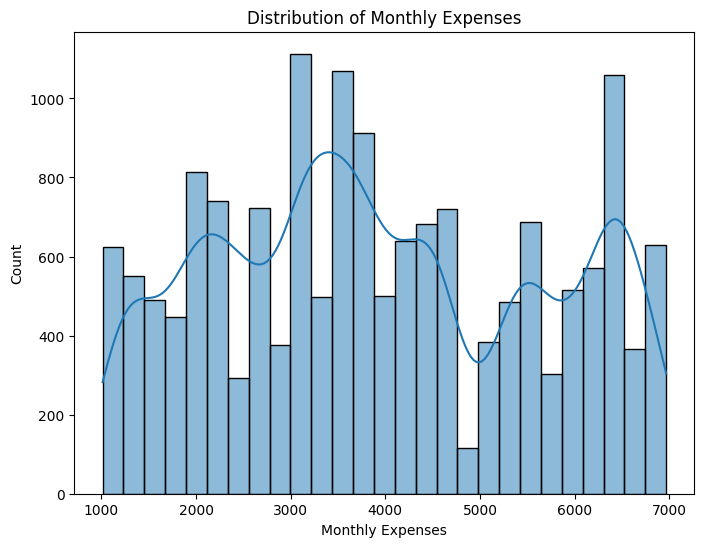

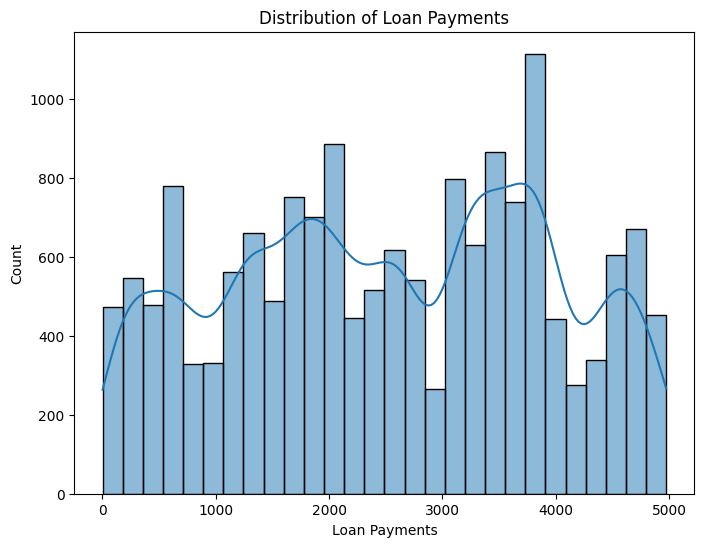

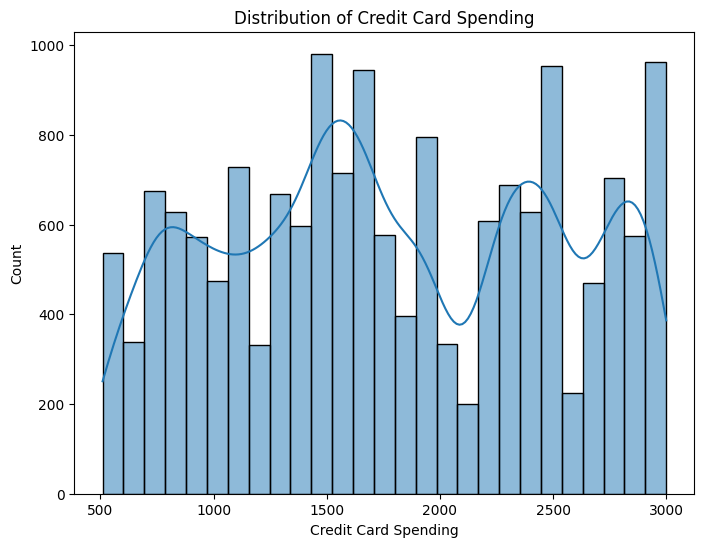

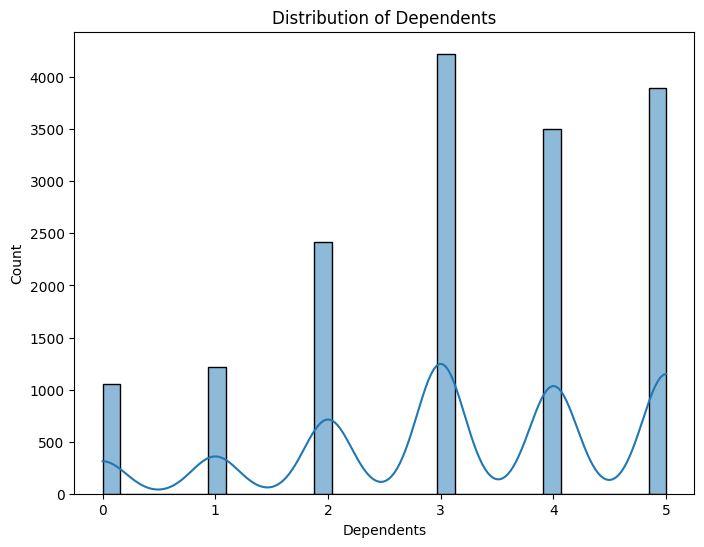

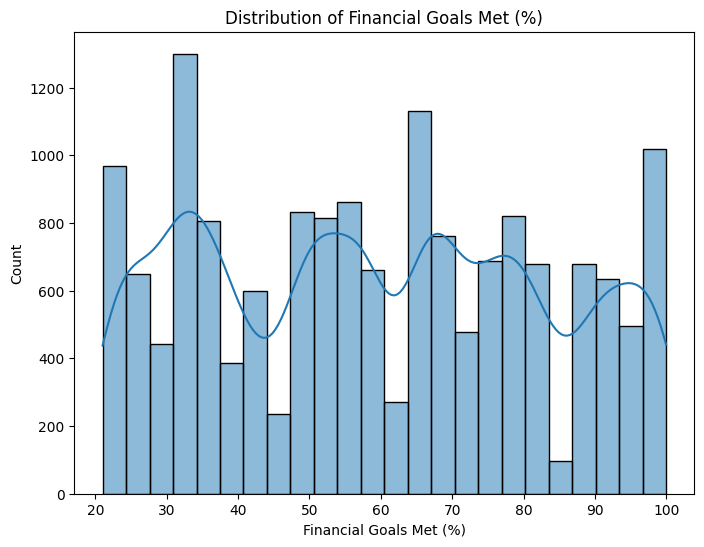

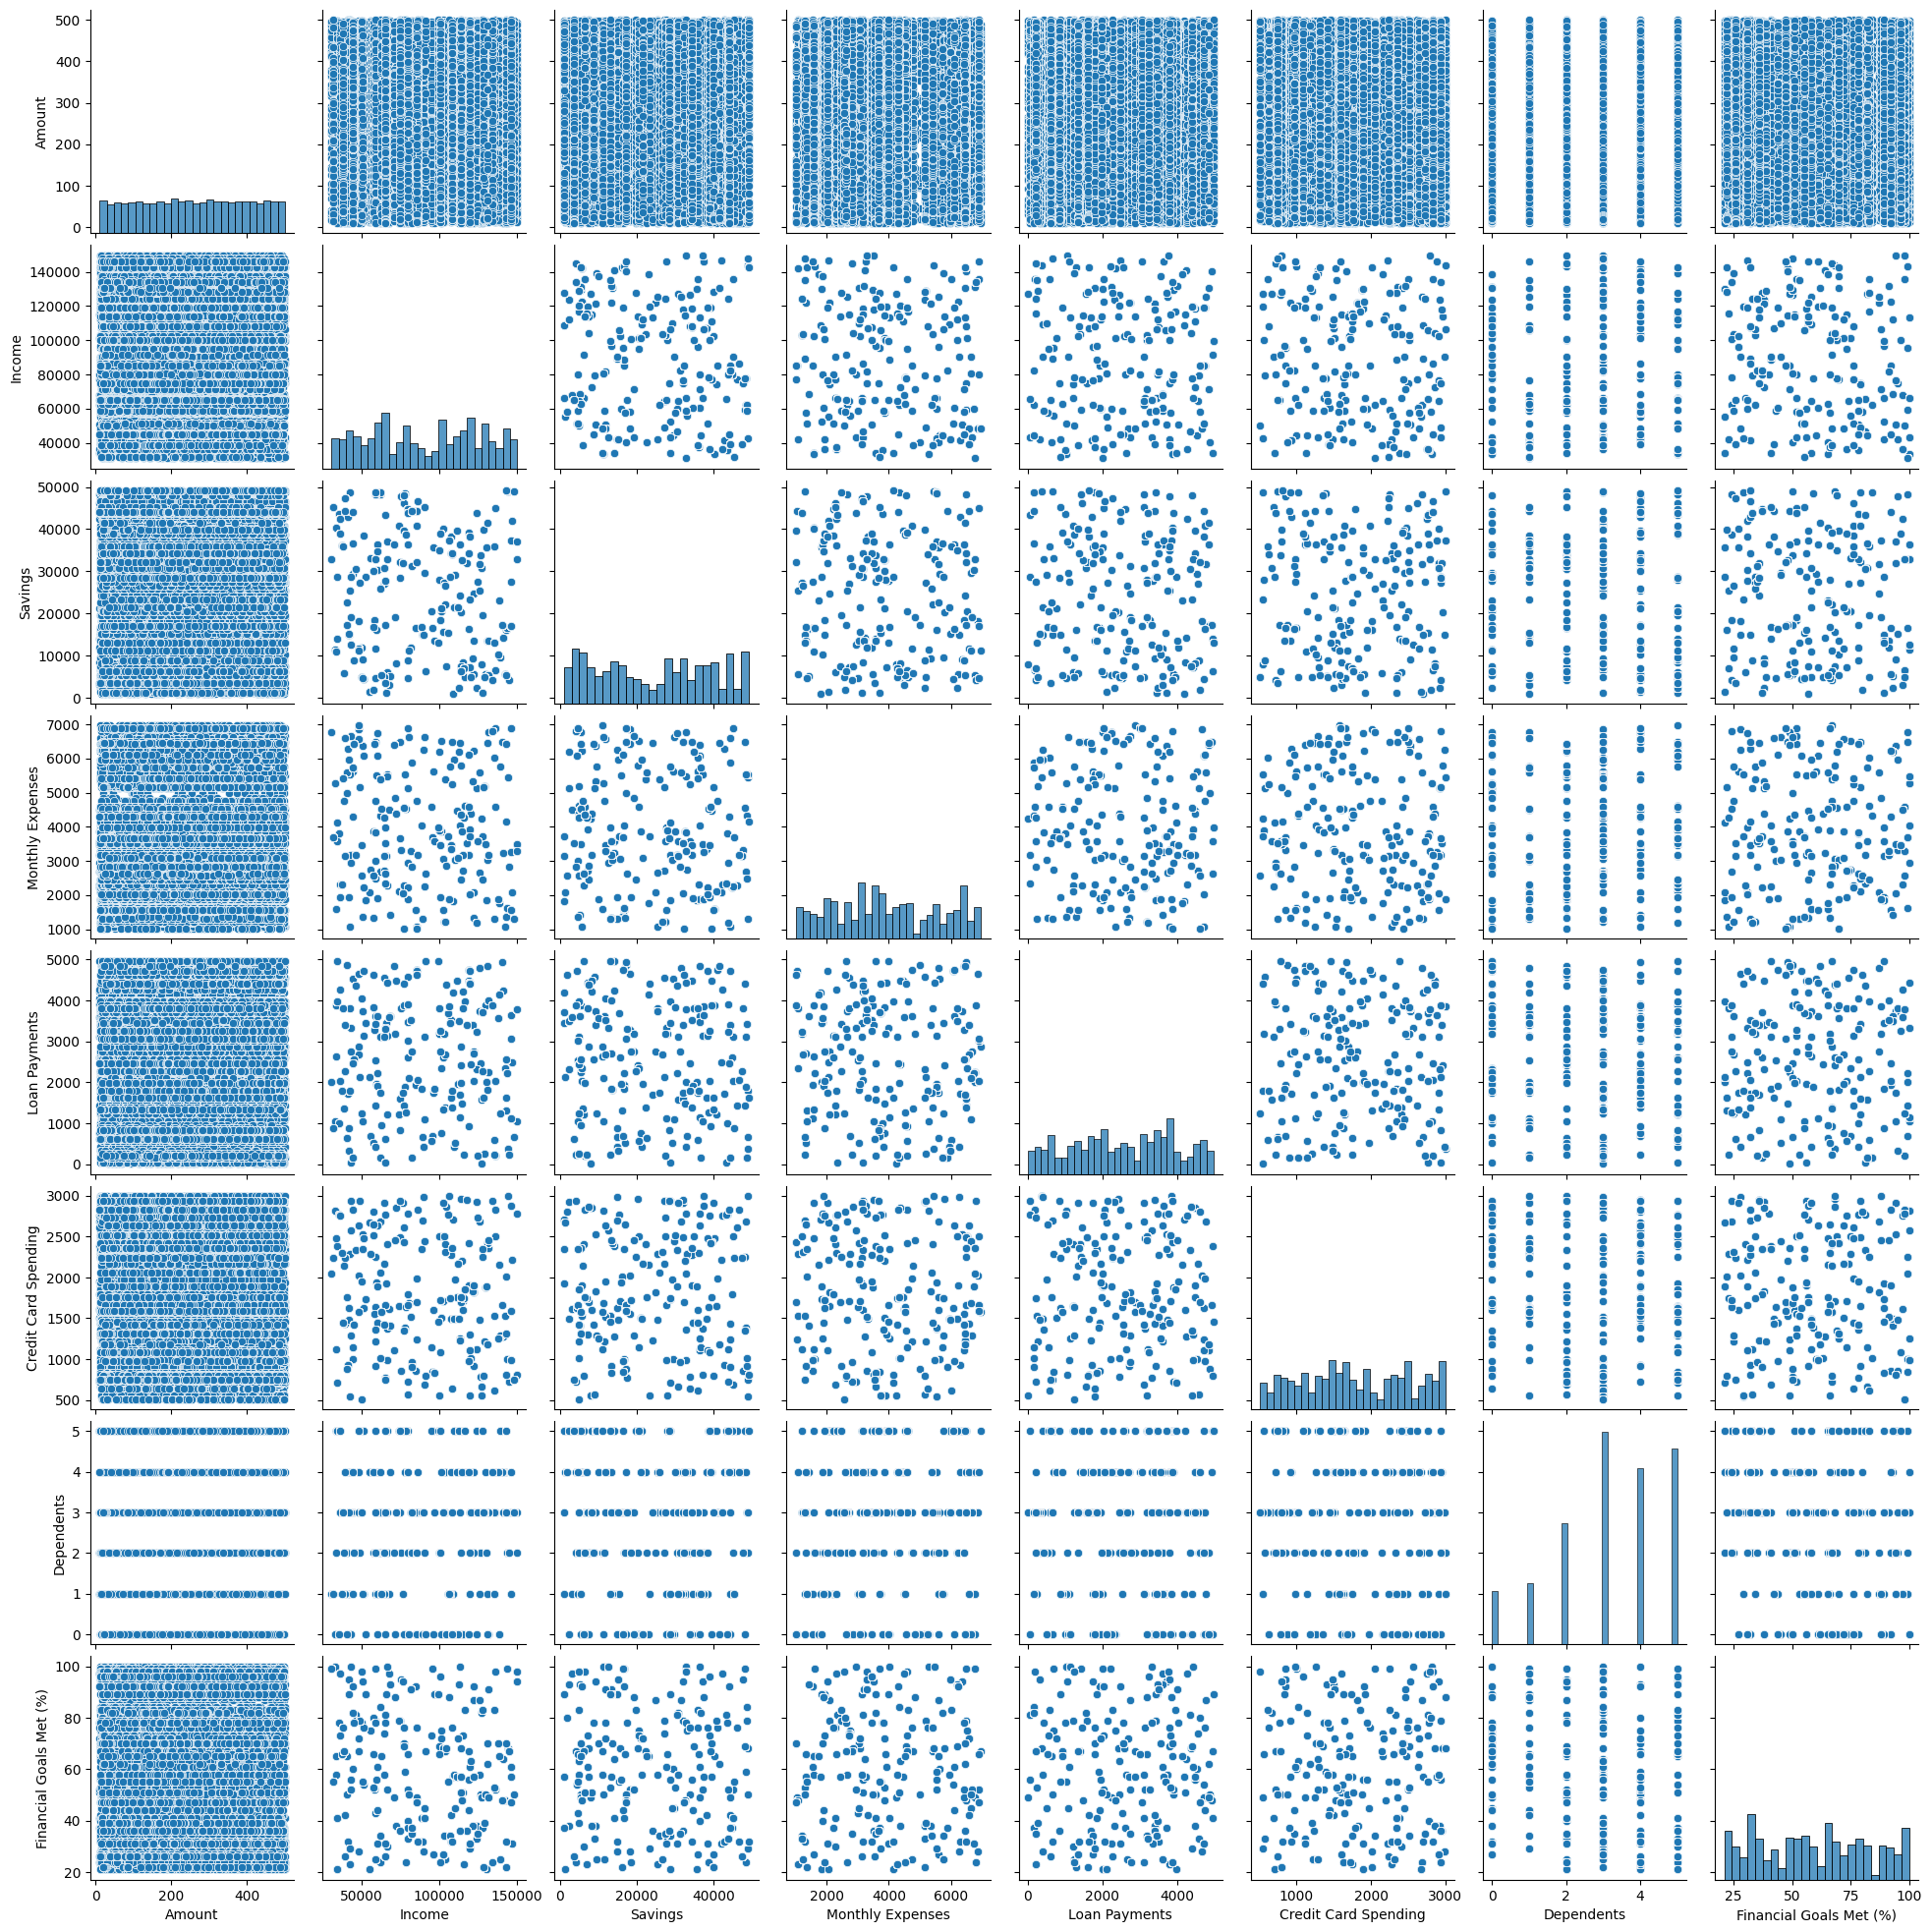

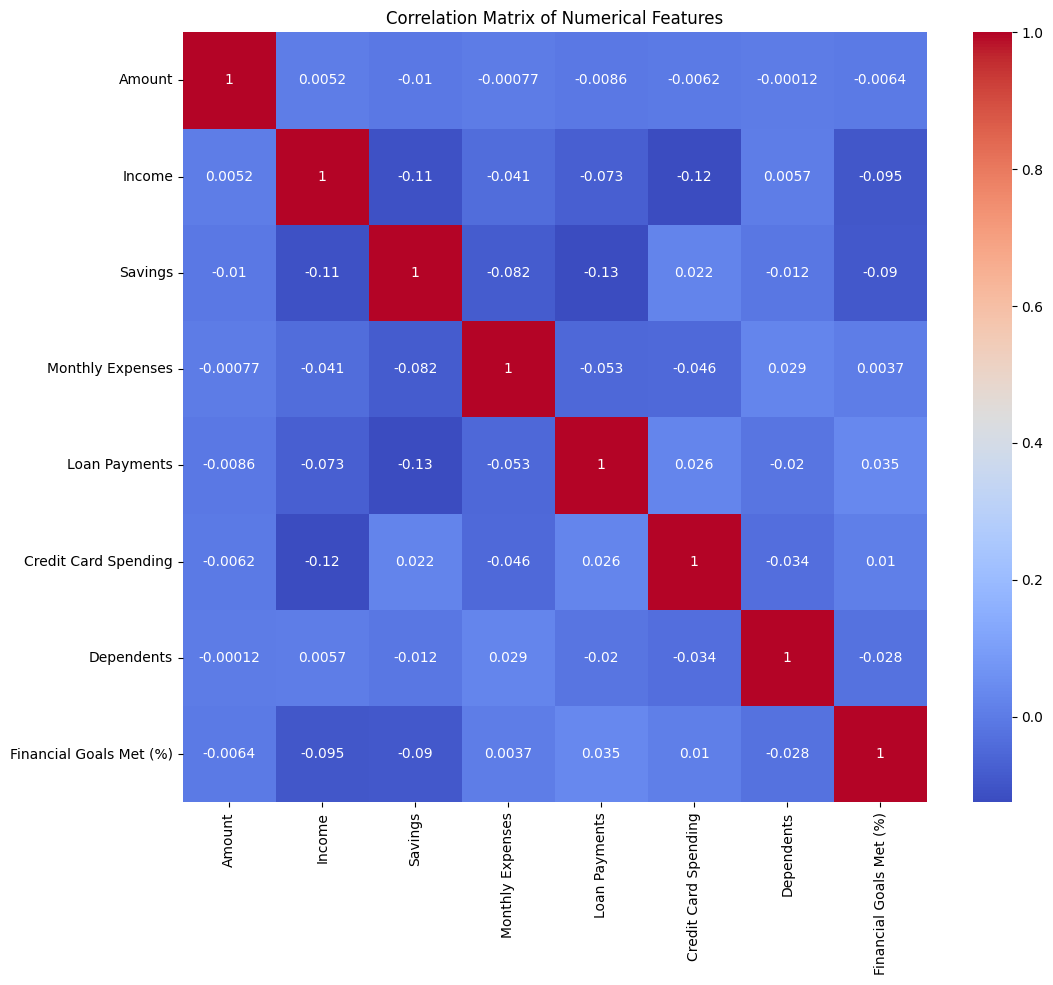

Value counts for Family ID:
Family ID
FAM194    167
FAM005    165
FAM187    156
FAM050    155
FAM071    144
         ... 
FAM022     24
FAM180     24
FAM075     23
FAM174     19
FAM197     19
Name: count, Length: 200, dtype: int64



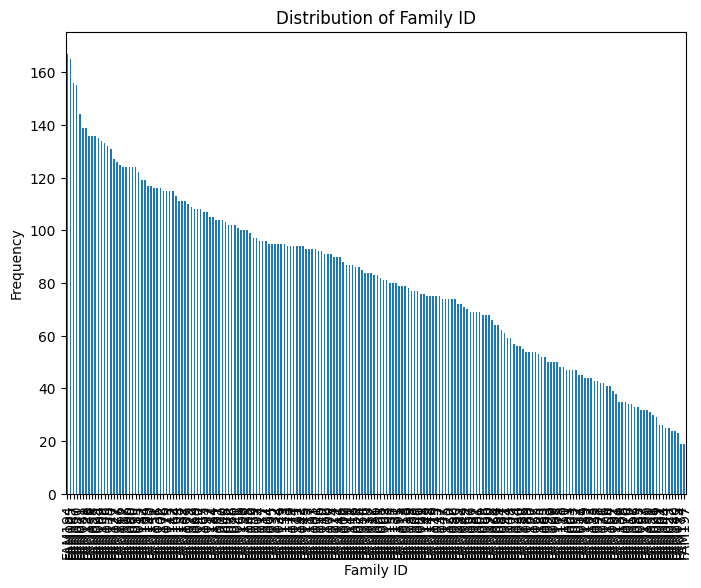

Value counts for Member ID:
Member ID
FAM006_Member3    30
FAM194_Member1    30
FAM123_Member2    30
FAM084_Member2    30
FAM194_Member7    30
                  ..
FAM056_Member1     5
FAM095_Member6     5
FAM057_Member2     5
FAM176_Member1     5
FAM138_Member1     5
Name: count, Length: 926, dtype: int64



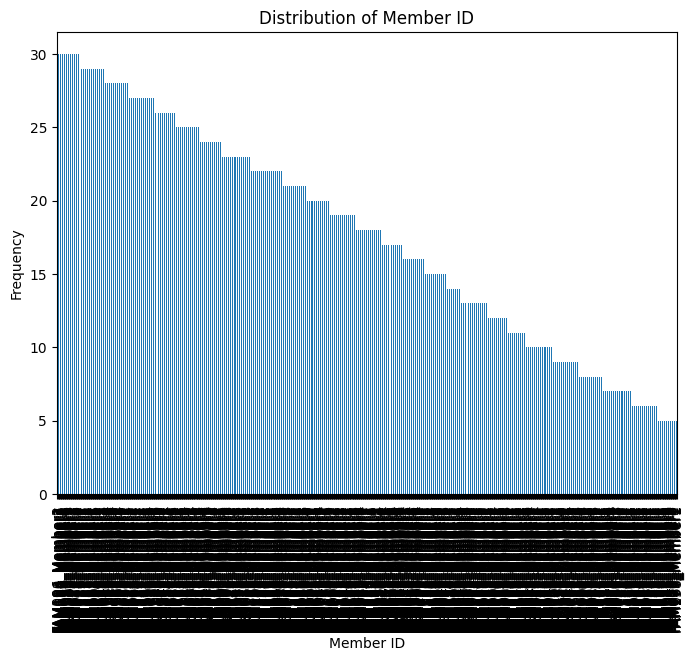

Value counts for Category:
Category
Groceries        2390
Entertainment    2383
Utilities        2359
Food             2355
Education        2338
Travel           2270
Healthcare       2211
Name: count, dtype: int64



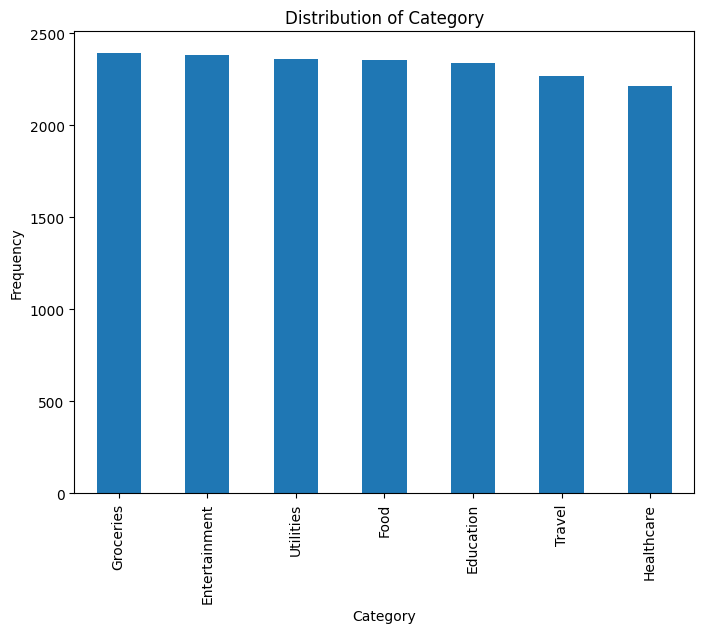

In [3]:

# Display basic information about the dataset
data.info()

# Summary statistics for numerical features
data.describe()

# Check for missing values
data.isnull().sum()

# Explore the distribution of numerical features
for col in data.select_dtypes(include=['number']):
  plt.figure(figsize=(8, 6))
  sns.histplot(data[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

# Analyze relationships between numerical features
sns.pairplot(data.select_dtypes(include=['number']))
plt.show()

# Correlation matrix heatmap
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Explore categorical features (if any)
for col in data.select_dtypes(include=['object', 'category']):
    print(f"Value counts for {col}:\n{data[col].value_counts()}\n")

    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [4]:


# Convert Transaction Date to datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], format='%d-%m-%Y')

# Family-level spending patterns
family_spending = data.groupby('Family ID').agg({
    'Amount': 'sum',
    'Income': 'first',
    'Savings': 'first',
    'Monthly Expenses': 'first',
    'Loan Payments': 'first',
    'Credit Card Spending': 'first',
    'Financial Goals Met (%)': 'first'
}).reset_index()


In [7]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')


In [8]:
def calculate_financial_score(row):
    """
    Calculate the financial score based on various financial metrics.

    Parameters:
    row (pd.Series): A row from the DataFrame containing financial metrics.

    Returns:
    float: A financial score between 0 and 100.
    """

    # Define weights for each scoring component
    WEIGHT_SAVINGS = 30
    WEIGHT_EXPENSES = 20
    WEIGHT_LOANS = 15
    WEIGHT_CREDIT = 10
    WEIGHT_CATEGORY = 15
    WEIGHT_GOALS = 10  # Adjusted to keep total weight at 100



    # Savings-to-Income Ratio
    # Change here: 'Income' instead of 'income'
    savings_ratio_score = min(WEIGHT_SAVINGS, (row['Savings'] / row['Income']) * WEIGHT_SAVINGS if row['Income'] > 0 else 0)

    # Monthly Expenses as % of Income
    # Change here: 'Monthly Expenses' instead of 'expenses'
    expense_ratio_score = WEIGHT_EXPENSES * max(0, 1 - (row['Monthly Expenses'] / row['Income']) if row['Income'] > 0 else 0)

    # Loan Payments as % of Income
    # Change here: 'Loan Payments' instead of 'loan_payments'
    loan_ratio_score = WEIGHT_LOANS * max(0, 1 - (row['Loan Payments'] / row['Income']) if row['Income'] > 0 else 0)

    # Credit Card Spending Trends
    # Change here: 'Credit Card Spending' instead of 'credit_card_spending'
    credit_card_score = WEIGHT_CREDIT * max(0, 1 - (row['Credit Card Spending'] / row['Income']) if row['Income'] > 0 else 0)

    # Spending Category Distribution
    discretionary_categories = ['travel', 'entertainment']
    discretionary_spending = sum(row[category] for category in discretionary_categories if category in row)
    # Change here: 'Monthly Expenses' instead of 'expenses'
    total_spending = row['Monthly Expenses']

    # Calculate category score
    category_score = WEIGHT_CATEGORY - WEIGHT_CATEGORY * (discretionary_spending / total_spending if total_spending > 0 else 0)

    # Financial Goals Met
    # Change here: 'Financial Goals Met (%)' instead of 'financial_goals_met'
    goals_score = (row['Financial Goals Met (%)'] / 100) * WEIGHT_GOALS  # Assuming financial_goals_met is a percentage

    # Final Score Calculation
    final_score = (
        savings_ratio_score +
        expense_ratio_score +
        loan_ratio_score +
        credit_card_score +
        category_score +
        goals_score
    )

    return max(0, min(100, final_score))  # Clamp score between 0 and 100

In [9]:

# Assuming 'family_spending' DataFrame is already created as in the previous code

family_spending['Final Score'] = family_spending.apply(calculate_financial_score, axis=1)
print(family_spending[['Family ID', 'Final Score']])

    Family ID  Final Score
0      FAM001    70.538512
1      FAM002    81.565460
2      FAM003    75.754553
3      FAM004    74.646626
4      FAM005    67.427737
..        ...          ...
195    FAM196    62.918440
196    FAM197    74.108231
197    FAM198    65.598500
198    FAM199    73.506552
199    FAM200    95.446610

[200 rows x 2 columns]


Justification for Scoring Logic
1.Savings-to-Income Ratio has the highest weight (30%) as savings directly reflect financial health and preparation for emergencies.
2.Monthly Expenses (20%) is prioritized to encourage disciplined spending habits.
3.Loan Payments (15%) focus on reducing reliance on debt.
4.Credit Card Spending (10%) emphasizes curbing excessive credit reliance.
5.Category Distribution (15%) balances essential and discretionary spending.
6.Financial Goals Met (10%) rewards families achieving their financial objectives.


In [35]:
#recommendations for improving financial scores (e.g., "Reduce discretionary
# spending by 10% to improve your score by X points")

def generate_recommendations(row):
    recommendations = []
    score = row['Final Score']

    # Savings recommendations
    savings_ratio = row['Savings'] / row['Income'] if row['Income'] > 0 else 0
    if savings_ratio < 0.2:
        recommendations.append(f"Increase savings by 5% to improve your score by {min(10, 100 - score)} points.")

    # Expenses recommendations
    expense_ratio = row['Monthly Expenses'] / row['Income'] if row['Income'] > 0 else 0
    if expense_ratio > 0.7:
        recommendations.append(f"Reduce discretionary spending by 10% to improve your score by {min(8, 100 - score)} points.")

    # Loan payments recommendations
    loan_ratio = row['Loan Payments'] / row['Income'] if row['Income'] > 0 else 0
    if loan_ratio > 0.3:
        recommendations.append(f"Explore options to reduce loan payments to improve your score by {min(7, 100 - score)} points.")

    # Credit card spending recommendations
    credit_ratio = row['Credit Card Spending'] / row['Income'] if row['Income'] > 0 else 0
    if credit_ratio > 0.15:
        recommendations.append(f"Reduce credit card spending to improve your score by {min(5, 100 - score)} points.")

    # Financial goals recommendations
    if row['Financial Goals Met (%)'] < 80:
        recommendations.append(f"Make a concrete plan to achieve financial goals to improve your score by {min(6, 100-score)} points.")

    return recommendations


family_spending['Recommendations'] = family_spending.apply(generate_recommendations, axis=1)
print(family_spending[['Family ID', 'Final Score', 'Recommendations']])

    Family ID  Final Score                                    Recommendations
0      FAM001    70.538512  [Increase savings by 5% to improve your score ...
1      FAM002    81.565460  [Make a concrete plan to achieve financial goa...
2      FAM003    75.754553                                                 []
3      FAM004    74.646626                                                 []
4      FAM005    67.427737  [Increase savings by 5% to improve your score ...
..        ...          ...                                                ...
195    FAM196    62.918440  [Increase savings by 5% to improve your score ...
196    FAM197    74.108231  [Make a concrete plan to achieve financial goa...
197    FAM198    65.598500  [Increase savings by 5% to improve your score ...
198    FAM199    73.506552  [Make a concrete plan to achieve financial goa...
199    FAM200    95.446610                                                 []

[200 rows x 3 columns]


**3. Insights Visualization:**


<ipython-input-10-e083f434640a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")


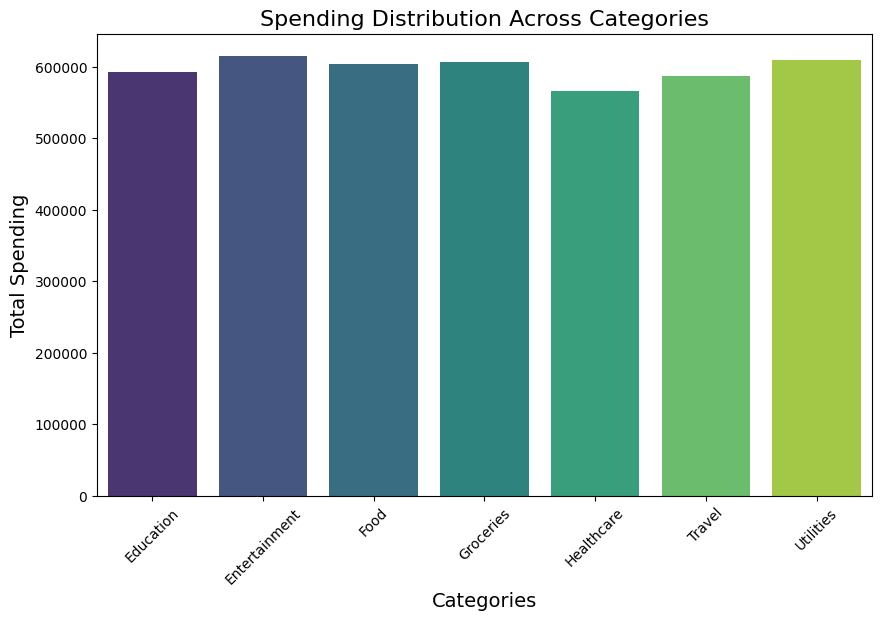

In [10]:
#1. Spending Distribution Across Categories
import matplotlib.pyplot as plt
import seaborn as sns

# Summing expenses by category
category_distribution = data.groupby('Category')['Amount'].sum()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")
plt.title("Spending Distribution Across Categories", fontsize=16)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Total Spending", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [15]:
#2. Family-Wise Financial Scores
import plotly.express as px

# Bar Chart for Family Financial Scores
# Changed 'Family ID' to 'family_id' in groupby and x arguments
fig = px.bar(
    data.groupby('Family ID')['Financial Goals Met (%)'].mean().reset_index(),
    x='Family ID',
    y='Financial Goals Met (%)',  # Changed y to the correct column name
    title='Family-Wise Financial Scores',
    labels={'Family ID': 'Family ID','Financial Goals Met (%)': 'Financial Score'}, # Corrected label for x-axis
    color='Financial Goals Met (%)',
    color_continuous_scale='viridis'
)
fig.update_layout(title_font_size=16, xaxis_title='Family ID', yaxis_title='Financial Score')
fig.show()

In [19]:
# Member-wise spending trends.
import pandas as pd
import plotly.express as px

# Ensure Transaction Date is in datetime format
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Aggregate data: Sum spending for each Member by date
member_trends = data.groupby(['Member ID', 'Transaction Date'])['Amount'].sum().reset_index()

# Sort the data by Transaction Date for smooth plotting
member_trends = member_trends.sort_values(by='Transaction Date')

# Plot: Line Chart for Member-Wise Spending Trends
fig = px.line(
    member_trends,
    x='Transaction Date',
    y='Amount',
    color='Member ID',
    title='Member-Wise Spending Trends',
    labels={'Transaction Date': 'Date', 'Amount': 'Total Spending'},
    line_group='Member ID'
)
fig.update_layout(title_font_size=16, xaxis_title='Transaction Date', yaxis_title='Spending')
fig.show()


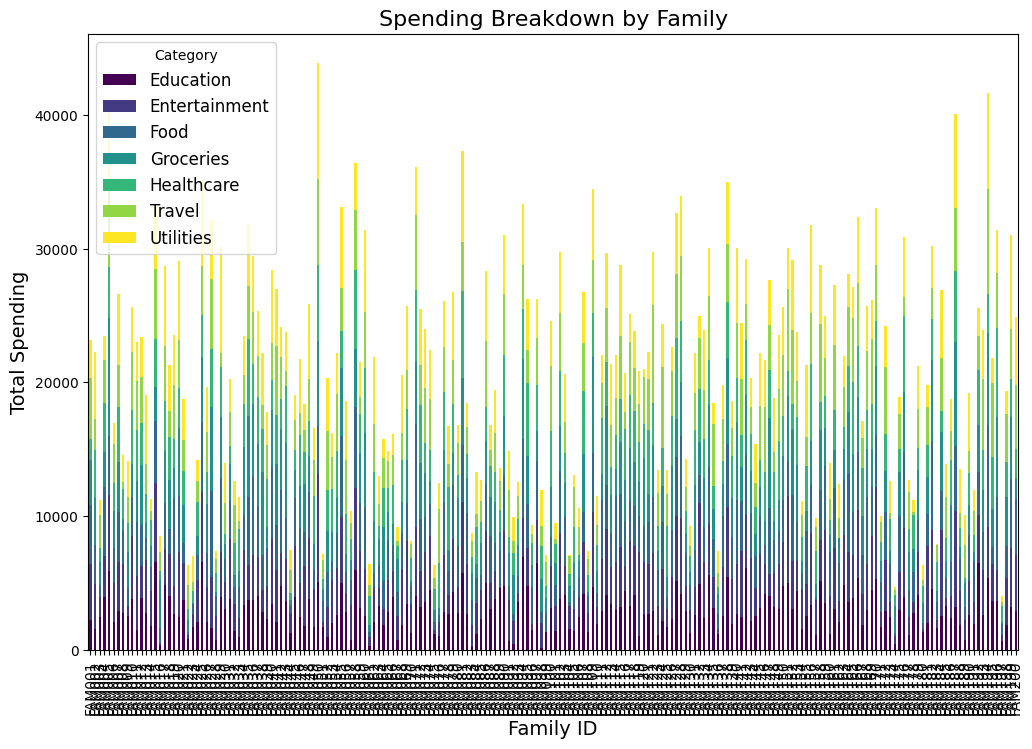

In [21]:
 #pending Breakdown by Family
 # Pivot table for stacked bar chart
spending_by_family = data.pivot_table(index='Family ID', columns='Category', values='Amount', aggfunc='sum').fillna(0)

# Stacked Bar Chart
spending_by_family.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title("Spending Breakdown by Family", fontsize=16)
plt.xlabel("Family ID", fontsize=14)
plt.ylabel("Total Spending", fontsize=14)
plt.legend(title='Category', fontsize=12)
plt.show()


In [23]:
#Useing AI/ML to predict next month’s expenses or savings trends.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data for prediction
# Select relevant features and target variable
features = ['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']
target = 'Monthly Expenses'  # Or 'Savings' depending on what you want to predict

# Create the feature and target DataFrames
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict next month's expenses/savings
# Create a DataFrame with the same features as the training data but replace with hypothetical next-month values.
next_month_data = pd.DataFrame({
    'Income': [data['Income'].mean()],  # Replace with next month's expected income
    'Savings': [data['Savings'].mean()],  # Replace with next month's expected savings
    'Monthly Expenses': [data['Monthly Expenses'].mean()],  # Replace with next month's expected expenses
    'Loan Payments': [data['Loan Payments'].mean()], # Replace with next month's expected loan payments
    'Credit Card Spending': [data['Credit Card Spending'].mean()] # Replace with next month's expected credit card spending
})

next_month_prediction = model.predict(next_month_data)

print(f"Predicted next month's {target}: {next_month_prediction[0]}")

Mean Squared Error: 5.447026808447893e-24
Predicted next month's Monthly Expenses: 3948.522384398381


In [33]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Prepare the data for prediction
# Select relevant features and target variable
features = ['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']
target = 'Monthly Expenses'  # Or 'Savings' depending on what you want to predict

# Create the feature and target DataFrames
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

# Initialize and train a DecisionTreeRegressor model
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

# Evaluate the models
mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error (Random Forest): {mse}")
print(f"Mean Squared Error (Decision Tree): {mse2}")

# Predict next month's expenses/savings for each family
# Assuming you want to predict next month's expenses for each family based on their current financial status

# Create a copy of the relevant columns from the original data
next_month_data = data[features].copy()

#  Make predictions using the trained models
next_month_prediction = model.predict(next_month_data)
next_month_prediction2 = model2.predict(next_month_data)

# Add predictions as new columns in the DataFrame
data['Predicted Expenses (Random Forest)'] = next_month_prediction
data['Predicted Expenses (Decision Tree)'] = next_month_prediction2

# Display predictions along with family ID
print(data[['Family ID', 'Monthly Expenses', 'Predicted Expenses (Random Forest)', 'Predicted Expenses (Decision Tree)']])

Mean Squared Error (Random Forest): 0.0
Mean Squared Error (Decision Tree): 0.0
      Family ID  Monthly Expenses  Predicted Expenses (Random Forest)  \
0        FAM001              5781                              5781.0   
1        FAM001              5781                              5781.0   
2        FAM001              5781                              5781.0   
3        FAM001              5781                              5781.0   
4        FAM001              5781                              5781.0   
...         ...               ...                                 ...   
16301    FAM200              4296                              4296.0   
16302    FAM200              4296                              4296.0   
16303    FAM200              4296                              4296.0   
16304    FAM200              4296                              4296.0   
16305    FAM200              4296                              4296.0   

       Predicted Expenses (Decision Tree)  